# Madison Chester (solo)

## 1: Gradient Descent Methods

### 1.1 - A simple quadratic function

In [1]:
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import tqdm

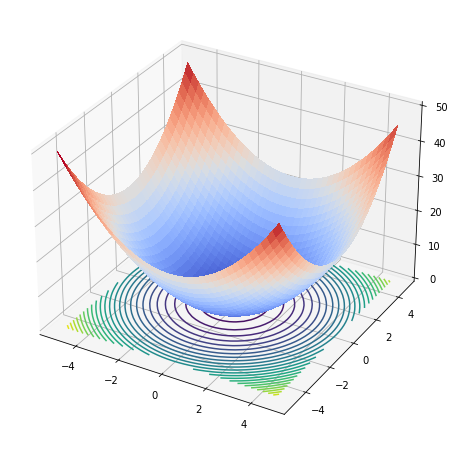

In [2]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
x1, x2 = np.meshgrid(x1, x2)
Y = x1**2 + x2**2

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, Y, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.contour(x1,x2,Y,30,zdir='z',offset=0)

plt.show()

#### 1.1.1

Final Point for Start (4, 4) after 20 iterations with Learning Rate 0.1: (0.04611686018427388, 0.04611686018427388)
Final Point for Start (-3, 3) after 50 iterations with Learning Rate 0.1: (-4.281743078117882e-05, 4.281743078117882e-05)
Final Point for Start (-2, -2) after 80 iterations with Learning Rate 0.1: (-3.5336941295567705e-08, -3.5336941295567705e-08)
Final Point for Start (1, -1) after 100 iterations with Learning Rate 0.1: (2.0370359763344877e-10, -2.0370359763344877e-10)


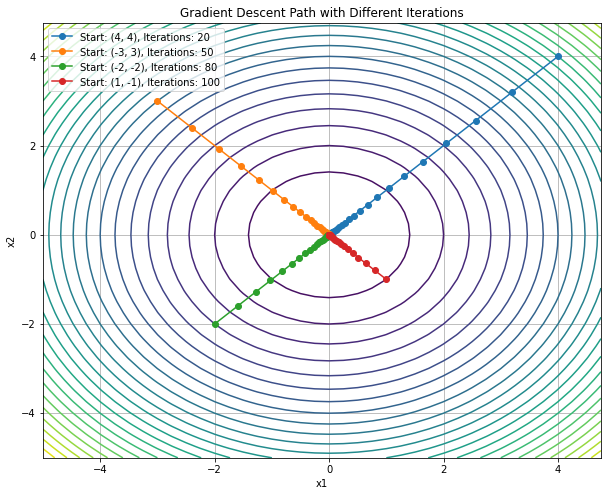

In [3]:
def func(x1, x2):
    return x1**2 + x2**2

def gradient(x1, x2):
    df_dx1 = 2 * x1
    df_dx2 = 2 * x2
    return df_dx1, df_dx2

def gradient_descent(starting_point, learning_rate, max_iterations):
    path = [starting_point]
    current_point = starting_point
    
    for i in range(max_iterations):
        x1, x2 = current_point  
        grad_x1, grad_x2 = gradient(x1, x2)
        update_x1 = -learning_rate * grad_x1
        update_x2 = -learning_rate * grad_x2
        new_point = (current_point[0] + update_x1, current_point[1] + update_x2)
        path.append(new_point)
        current_point = new_point
    
    final_point = path[-1]
    print(f"Final Point for Start {starting_point} after {max_iterations} iterations with Learning Rate {learning_rate}: {final_point}")
    
    return np.array(path)

learning_rate = 0.1

starting_points = [(4, 4, 20), (-3, 3, 50), (-2, -2, 80), (1, -1, 100)]

x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
x1, x2 = np.meshgrid(x1, x2)
Y = func(x1, x2)

plt.figure(figsize=(10, 8))
plt.contour(x1, x2, Y, levels=30)

for start_x1, start_x2, max_iter in starting_points:
    start_point = (start_x1, start_x2)
    path = gradient_descent(start_point, learning_rate, max_iter)
    path_x1, path_x2 = path.T
    plt.plot(path_x1, path_x2, marker='o', label=f'Start: {start_point}, Iterations: {max_iter}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Gradient Descent Path with Different Iterations')
plt.grid()
plt.show()

#### 1.1.2

In [4]:
learning_rates = [0.1, 1, 2] 

starting_points = [(4, 4, 20), (-3, 3, 50), (-2, -2, 80), (1, -1, 100)]

for learning_rate in learning_rates:
    for start_x1, start_x2, max_iter in starting_points:
        start_point = (start_x1, start_x2)
        path = gradient_descent(start_point, learning_rate, max_iter)

Final Point for Start (4, 4) after 20 iterations with Learning Rate 0.1: (0.04611686018427388, 0.04611686018427388)
Final Point for Start (-3, 3) after 50 iterations with Learning Rate 0.1: (-4.281743078117882e-05, 4.281743078117882e-05)
Final Point for Start (-2, -2) after 80 iterations with Learning Rate 0.1: (-3.5336941295567705e-08, -3.5336941295567705e-08)
Final Point for Start (1, -1) after 100 iterations with Learning Rate 0.1: (2.0370359763344877e-10, -2.0370359763344877e-10)
Final Point for Start (4, 4) after 20 iterations with Learning Rate 1: (4, 4)
Final Point for Start (-3, 3) after 50 iterations with Learning Rate 1: (-3, 3)
Final Point for Start (-2, -2) after 80 iterations with Learning Rate 1: (-2, -2)
Final Point for Start (1, -1) after 100 iterations with Learning Rate 1: (1, -1)
Final Point for Start (4, 4) after 20 iterations with Learning Rate 2: (13947137604, 13947137604)
Final Point for Start (-3, 3) after 50 iterations with Learning Rate 2: (-215369396307555776

### 1.2 - A function with multiple minima

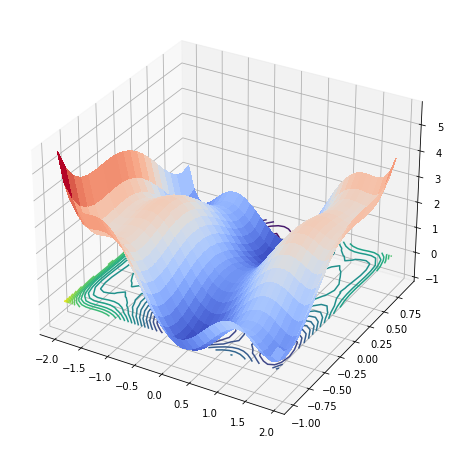

In [5]:
x1 = np.arange(-2, 2, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1, x2 = np.meshgrid(x1, x2)

def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3) * x1**4) + x1 * x2 + x2**2 * (-4 + 4 * x2**2)

Y = f(x1, x2)

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, Y, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.contour(x1,x2,Y,30,zdir='z',offset=0)

plt.show()

#### 1.2.1

Final Point for Start (-2.0, -1.0) after 100 iterations with Learning Rate 0.1: (-0.08984201310031807, 0.7126564030207395)
Final Point for Start (-2.0, -0.5) after 100 iterations with Learning Rate 0.1: (0.08984201310031807, -0.7126564030207395)
Final Point for Start (-2.0, 0.0) after 100 iterations with Learning Rate 0.1: (-0.08984201310031804, 0.7126564030207397)
Final Point for Start (-2.0, 0.5) after 100 iterations with Learning Rate 0.1: (-0.08984201310031807, 0.7126564030207395)
Final Point for Start (-2.0, 1.0) after 100 iterations with Learning Rate 0.1: (-0.08984201310031807, 0.7126564030207395)
Final Point for Start (-1.5, -1.0) after 100 iterations with Learning Rate 0.1: (-1.7545154643916052, 0.5956225078312448)
Final Point for Start (-1.5, -0.5) after 100 iterations with Learning Rate 0.1: (-1.6071047529201976, -0.5686514548841314)
Final Point for Start (-1.5, 0.0) after 100 iterations with Learning Rate 0.1: (-1.7545154643916054, 0.595622507831245)
Final Point for Start (

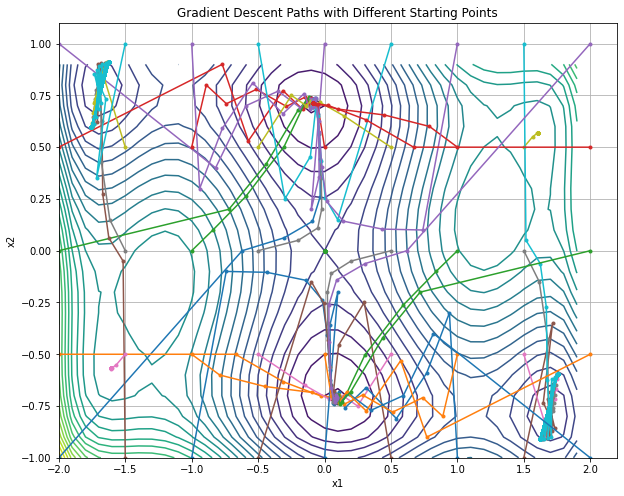

In [6]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3) * x1**4) + x1 * x2 + x2**2 * (-4 + 4 * x2**2)

def gradient(x1, x2):
    df_dx1 = 2*x1**5 - 8.4*x1**3 + 8*x1 + x2
    df_dx2 = x1 - 8*x2 + 16*x2**3
    return df_dx1, df_dx2

def gradient_descent(starting_point, learning_rate, max_iterations):
    path = [starting_point]
    current_point = starting_point
    
    for i in range(max_iterations):
        grad_x1, grad_x2 = gradient(*current_point)
        update_x1 = -learning_rate * grad_x1
        update_x2 = -learning_rate * grad_x2
        new_point = (current_point[0] + update_x1, current_point[1] + update_x2)
        path.append(new_point)
        current_point = new_point
    
    final_point = path[-1]
    print(f"Final Point for Start {starting_point} after {max_iterations} iterations with Learning Rate {learning_rate}: {final_point}")
    
    return np.array(path)

learning_rate = 0.1
max_iterations = 100

x1 = np.arange(-2, 2, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1, x2 = np.meshgrid(x1, x2)
Y = f(x1, x2)

plt.figure(figsize=(10, 8))
contour = plt.contour(x1, x2, Y, levels=30)

starting_points = [(x1_start, x2_start) for x1_start in np.arange(-2, 2.5, 0.5) for x2_start in np.arange(-1, 1.5, 0.5)]

for start_x1, start_x2 in starting_points:
    start_point = (start_x1, start_x2)
    path = gradient_descent(start_point, learning_rate, max_iterations)
    path_x1, path_x2 = path.T
    plt.plot(path_x1, path_x2, marker='o', markersize=3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths with Different Starting Points')
plt.grid()
plt.show()

#### 1.2.2 a/b

Final Point for Start (-2.0, -1.0) after 8 iterations with Learning Rate 0.1: (-0.0889251787437882, 0.6971674938732643)
Final Point for Start (-2.0, -0.5) after 13 iterations with Learning Rate 0.1: (0.08983666932570511, -0.7127024293408905)
Final Point for Start (-2.0, 0.0) after 15 iterations with Learning Rate 0.1: (-0.08986879979962312, 0.7124225176297067)
Final Point for Start (-2.0, 0.5) after 9 iterations with Learning Rate 0.1: (-0.08939922921797866, 0.7166923944340411)
Final Point for Start (-2.0, 1.0) after 8 iterations with Learning Rate 0.1: (-0.09075042779396114, 0.7068098989746688)
Final Point for Start (-1.5, -1.0) after 9 iterations with Learning Rate 0.1: (-1.6528810917239216, 0.9081525064886392)
Final Point for Start (-1.5, -0.5) after 6 iterations with Learning Rate 0.1: (-1.6071015742872485, -0.5686593985180981)
Final Point for Start (-1.5, 0.0) after 9 iterations with Learning Rate 0.1: (-1.675559157151377, 0.8614357236461683)
Final Point for Start (-1.5, 0.5) afte

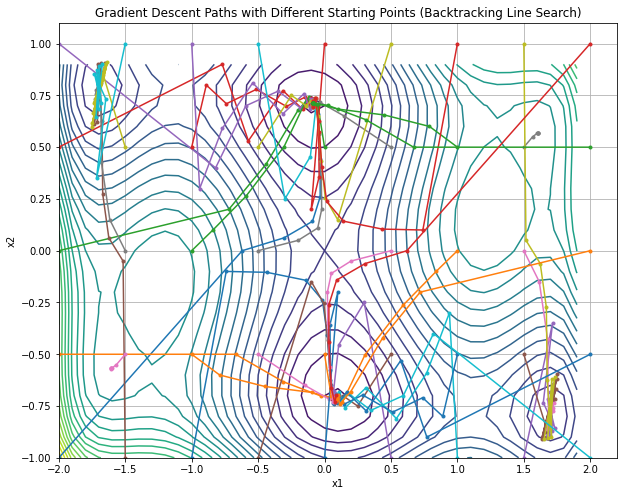

In [7]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3) * x1**4) + x1 * x2 + x2**2 * (-4 + 4 * x2**2)

def gradient(x1, x2):
    df_dx1 = 2 * x1**5 - 8.4 * x1**3 + 8 * x1 + x2
    df_dx2 = x1 - 8 * x2 + 16 * x2**3
    return df_dx1, df_dx2

def gradient_descent(starting_point, learning_rate, max_iterations):
    path = [starting_point]
    current_point = starting_point
    
    for i in range(max_iterations):
        grad_x1, grad_x2 = gradient(*current_point)
        update_x1 = -learning_rate * grad_x1
        update_x2 = -learning_rate * grad_x2
        new_point = (current_point[0] + update_x1, current_point[1] + update_x2)
        path.append(new_point)
        current_point = new_point
    
    final_point = path[-1]
    print(f"Final Point for Start {starting_point} after {max_iterations} iterations with Learning Rate {learning_rate}: {final_point}")
    
    return np.array(path)

def backtracking_line_search(f, gradient_f, x0, alpha=0.5, beta=0.8, max_iter=100, tol=1e-5):
    x = x0
    iter_count = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        step_size = 1.0
        while f(x[0] - step_size * gradient_x1, x[1] - step_size * gradient_x2) >= f(x[0], x[1]) - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
            step_size *= beta
        x = x - step_size * np.array([gradient_x1, gradient_x2])
        iter_count += 1

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, step_size, iter_count

def find_optimal_iterations(starting_point, learning_rate, tolerance):
    x_current = starting_point
    iteration = 0

    while True:
        x_next, step_size, num_iterations = backtracking_line_search(f, gradient, x_current, tol=tolerance)
        gradient_norm = np.linalg.norm(gradient(*x_next))

        if gradient_norm < tolerance:
            iteration += num_iterations
            break

        x_current = x_next
        iteration += num_iterations

    return iteration

learning_rate = 0.1
tolerance = 1e-5

x1 = np.arange(-2, 2, 0.1)
x2 = np.arange(-1, 1, 0.1)
x1, x2 = np.meshgrid(x1, x2)
Y = f(x1, x2)

plt.figure(figsize=(10, 8))
contour = plt.contour(x1, x2, Y, levels=30)

starting_points = [(x1_start, x2_start) for x1_start in np.arange(-2, 2.5, 0.5) for x2_start in np.arange(-1, 1.5, 0.5) if (x1_start, x2_start) != (0, 0)]

for start_x1, start_x2 in starting_points:
    start_point = (start_x1, start_x2)
    optimal_iterations = find_optimal_iterations(start_point, learning_rate, tolerance)
    path = gradient_descent(start_point, learning_rate, optimal_iterations)
    path_x1, path_x2 = path.T
    plt.plot(path_x1, path_x2, marker='o', markersize=3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths with Different Starting Points (Backtracking Line Search)')
plt.grid()
plt.show()

### 1.3 - The Rosenbrock function

#### 1.3.1

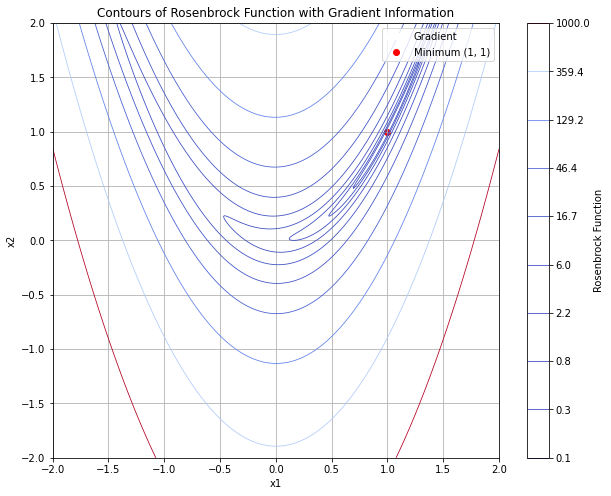

In [8]:
def rosenbrock(x1, x2, a=1, b=100):
    return (a - x1)**2 + b * (x2 - x1**2)**2

x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = rosenbrock(X1, X2)

plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 10), cmap='coolwarm', linewidths=0.8, linestyles='solid')
plt.colorbar(contour, label='Rosenbrock Function')

dx1, dx2 = np.gradient(Z, x1[1]-x1[0], x2[1]-x2[0])
plt.quiver(X1, X2, -dx1, -dx2, color='white', scale=50, label='Gradient')

plt.scatter(1, 1, color='red', marker='o', label='Minimum (1, 1)')
plt.legend()

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contours of Rosenbrock Function with Gradient Information')

plt.grid(True)
plt.show()

#### 1.3.2

Starting Point 1: (2, 2), Minimum Found: [1.03156353 1.0639391 ], Iterations: 231
Starting Point 2: (-1, -1), Minimum Found: [1.03117273 1.06345776], Iterations: 1931
Starting Point 3: (0, 0), Minimum Found: [0.96838161 0.93774542], Iterations: 1892
Starting Point 4: (-2, 2), Minimum Found: [1.03116961 1.06341722], Iterations: 3417


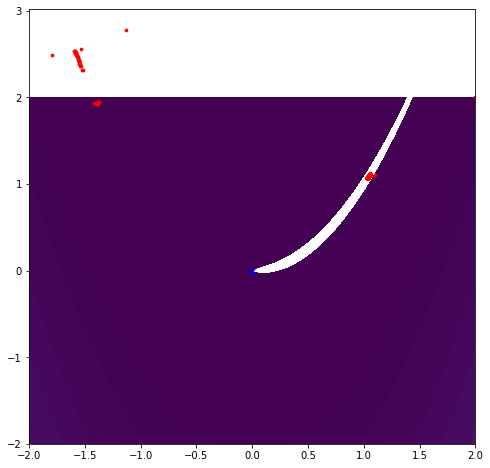

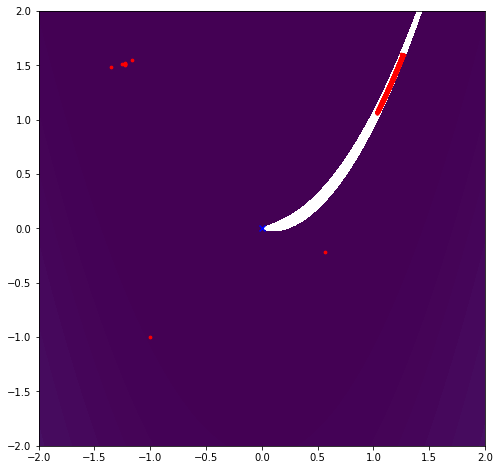

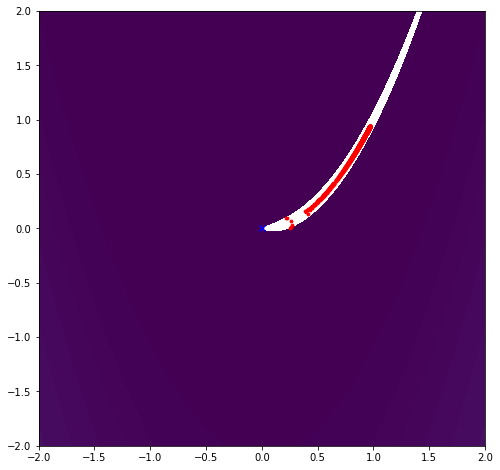

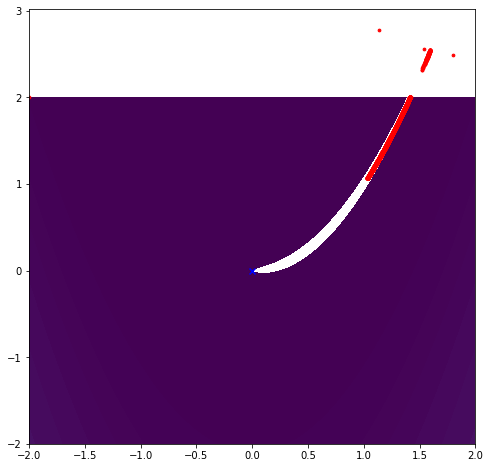

In [9]:
def rosenbrock(x1, x2, a=1, b=100):
    f = (a - x1)**2 + b * (x2 - x1**2)**2
    df_dx1 = -2 * (a - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return f, np.array([df_dx1, df_dx2])

def gradient_descent(starting_point, alpha=0.01, beta=0.5):
    x = starting_point
    x = x.astype(np.float64)
    iterations = 0
    path = [x.copy()]

    while True:
        f, gradient = rosenbrock(x[0], x[1])
        norm_gradient = np.linalg.norm(gradient)

        if norm_gradient < 1e-5 or abs(f) < 1e-3:
            break

        t = 1.0
        while rosenbrock(x[0] - t * gradient[0], x[1] - t * gradient[1])[0] >= f - alpha * t * np.dot(gradient, gradient):
            t *= beta

        x -= t * gradient
        iterations += 1
        path.append(x.copy())

    return x, iterations, path

starting_points = [(2, 2), (-1, -1), (0, 0), (-2, 2)]

for i, starting_point in enumerate(starting_points):
    x_min, num_iterations, path = gradient_descent(np.array(starting_point))
    print(f"Starting Point {i+1}: {starting_point}, Minimum Found: {x_min}, Iterations: {num_iterations}")
    
    path = np.array(path)
    
    plt.figure(figsize=(8, 8))
    plt.contourf(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='viridis') 
    plt.scatter(path[:, 0], path[:, 1], c='r', marker='.', label='Path', s=30)
    plt.scatter([0], [0], marker='x', color='blue')

Starting Point 1: (2, 2), Minimum Found: [1.00314994 1.0063369 ], Iterations: 1502
Starting Point 2: (-1, -1), Minimum Found: [1.00315121 1.00633875], Iterations: 3310
Starting Point 3: (0, 0), Minimum Found: [0.99684543 0.99368096], Iterations: 4585
Starting Point 4: (-2, 2), Minimum Found: [1.00315036 1.00633702], Iterations: 4821


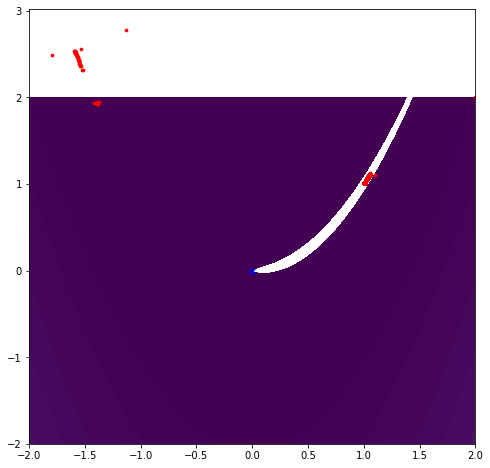

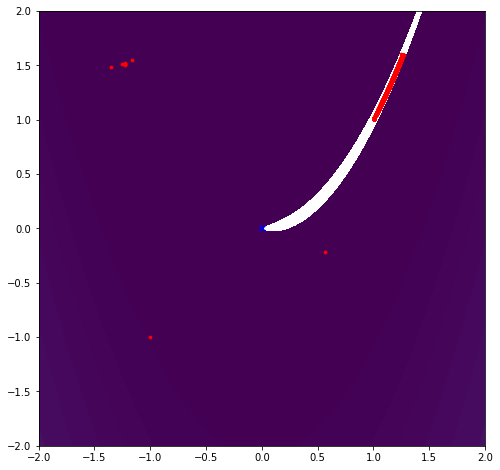

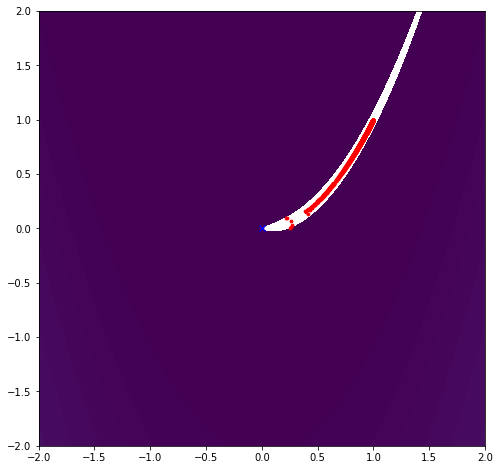

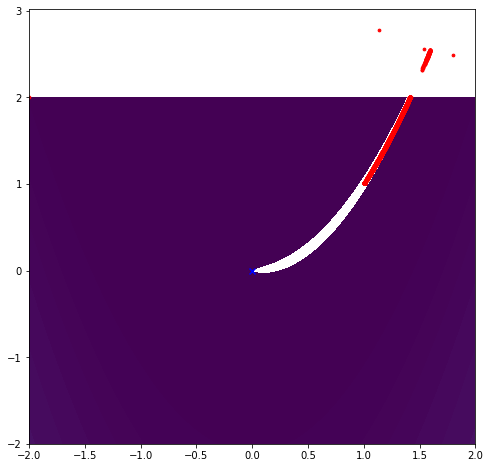

In [10]:
def rosenbrock(x1, x2, a=1, b=100):
    f = (a - x1)**2 + b * (x2 - x1**2)**2
    df_dx1 = -2 * (a - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return f, np.array([df_dx1, df_dx2])

def gradient_descent(starting_point, alpha=0.01, beta=0.5):
    x = starting_point
    x = x.astype(np.float64)
    iterations = 0
    path = [x.copy()]

    while True:
        f, gradient = rosenbrock(x[0], x[1])
        norm_gradient = np.linalg.norm(gradient)

        if norm_gradient < 1e-10 or abs(f) < 1e-5:
            break

        t = 1.0
        while rosenbrock(x[0] - t * gradient[0], x[1] - t * gradient[1])[0] >= f - alpha * t * np.dot(gradient, gradient):
            t *= beta

        x -= t * gradient
        iterations += 1
        path.append(x.copy())

    return x, iterations, path

starting_points = [(2, 2), (-1, -1), (0, 0), (-2, 2)]

for i, starting_point in enumerate(starting_points):
    x_min, num_iterations, path = gradient_descent(np.array(starting_point))
    print(f"Starting Point {i+1}: {starting_point}, Minimum Found: {x_min}, Iterations: {num_iterations}")
    
    path = np.array(path)
    
    plt.figure(figsize=(8, 8))
    plt.contourf(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='viridis') 
    plt.scatter(path[:, 0], path[:, 1], c='r', marker='.', label='Path', s=30)
    plt.scatter([0], [0], marker='x', color='blue')

## 2: Newton descent method

### 2.1 - A simple quadratic function

#### 2.1.1

In [11]:
def f(x1, x2):
    return 100 * x1**2 + x2**2

def gradient_f(x1, x2):
    grad_x1 = 200 * x1
    grad_x2 = 2 * x2
    return grad_x1, grad_x2

def backtracking_line_search(f, gradient_f, x0, alpha=0.5, beta=0.8, max_iter=1000, tol=1e-5):
    x = x0
    iter_count = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        step_size = 1.0
        while f(x[0] - step_size * gradient_x1, x[1] - step_size * gradient_x2) >= f(x[0], x[1]) - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
            step_size *= beta
        x = x - step_size * np.array([gradient_x1, gradient_x2])
        iter_count += 1

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, step_size, iter_count

x0 = np.array([1.0, 1.0])

result, step_size, iterations = backtracking_line_search(f, gradient_f, x0)

print("Minimum found at x:", result)
print("Step size:", step_size)
print("Number of iterations:", iterations)

Minimum found at x: [6.76008379e-09 4.54141220e-06]
Step size: 0.004722366482869652
Number of iterations: 130


#### 2.1.2

In [12]:
def f(x1, x2):
    return 100 * x1**2 + x2**2

def gradient_f(x1, x2):
    df_x1 = 200 * x1
    df_x2 = 2 * x2
    return df_x1, df_x2

def newton_backtracking_minimization(initial_guess, max_iterations=1000, tol=1e-6, alpha=0.5, beta=0.8):
    x = initial_guess
    iterations = 0

    while iterations < max_iterations:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        gradient_x = np.array([gradient_x1, gradient_x2])
        hessian_x = np.array([[200, 0], [0, 2]])

        step = -np.linalg.solve(hessian_x, gradient_x)

        x_new, step_size, iter_count = backtracking_line_search(f, gradient_f, x, alpha, beta, max_iter=max_iterations, tol=tol)
        x = x_new
        iterations += iter_count

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, f(*x), iterations

def backtracking_line_search(f, gradient_f, x0, alpha=0.5, beta=0.8, max_iter=100, tol=1e-5):
    x = x0
    iter_count = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        step_size = 1.0
        while f(x[0] - step_size * gradient_x1, x[1] - step_size * gradient_x2) >= f(x[0], x[1]) - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
            step_size *= beta
        x = x - step_size * np.array([gradient_x1, gradient_x2])
        iter_count += 1

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, step_size, iter_count

initial_guess = np.array([1.0, 1.0])

result, step_size, num_iterations = newton_backtracking_minimization(initial_guess)

print("Minimum found at x:", result)
print("Step size:", step_size)
print("Number of iterations:", num_iterations)

Minimum found at x: [8.81969928e-10 4.22445274e-07]
Step size: 1.7853779650471978e-13
Number of iterations: 154


#### 2.1.3

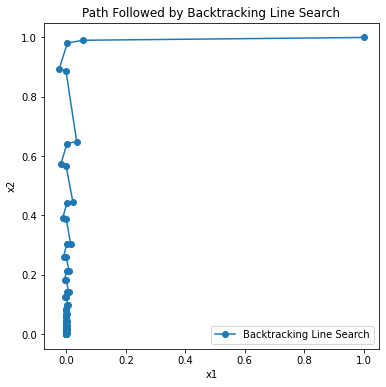

Points in path for Method 1: 131


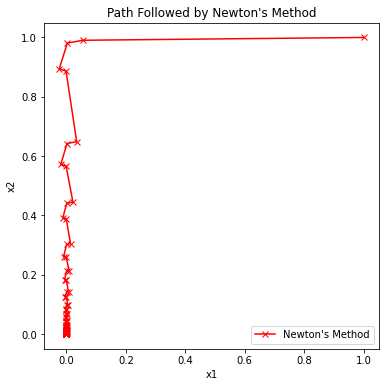

Points in path for Method 2: 155


In [13]:
def f(x1, x2):
    return 100 * x1**2 + x2**2

def gradient_f(x1, x2):
    grad_x1 = 200 * x1
    grad_x2 = 2 * x2
    return grad_x1, grad_x2

def backtracking_line_search(f, gradient_f, x0, alpha=0.5, beta=0.8, max_iter=1000, tol=1e-5):
    x = x0
    iter_count = 0
    path = [x0]

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        step_size = 1.0
        while f(x[0] - step_size * gradient_x1, x[1] - step_size * gradient_x2) >= f(x[0], x[1]) - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
            step_size *= beta
        x = x - step_size * np.array([gradient_x1, gradient_x2])
        path.append(x)
        iter_count += 1

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, step_size, iter_count, path

x0 = np.array([1.0, 1.0])
result, step_size, iterations, path1 = backtracking_line_search(f, gradient_f, x0)

path1 = np.array(path1)
plt.figure(figsize=(6, 6))
plt.plot(path1[:, 0], path1[:, 1], marker='o', label='Backtracking Line Search')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Path Followed by Backtracking Line Search')
plt.legend()
plt.show()

print(f"Points in path for Method 1: {len(path1)}")

def newton_backtracking_minimization_path(initial_guess, max_iterations=1000, tol=1e-6, alpha=0.5, beta=0.8):
    x = initial_guess
    iterations = 0
    path = [x]

    while iterations < max_iterations:
        gradient_x1, gradient_x2 = gradient_f(x[0], x[1])
        gradient_x = np.array([gradient_x1, gradient_x2])
        hessian_x = np.array([[200, 0], [0, 2]])

        step = -np.linalg.solve(hessian_x, gradient_x)

        x_new, _, iter_count, path = backtracking_line_search(f, gradient_f, x, alpha, beta, max_iter=max_iterations, tol=tol)
        x = x_new
        iterations += iter_count

        if np.linalg.norm(gradient_f(x[0], x[1])) < tol:
            break

    return x, iterations, path

result, num_iterations, path2 = newton_backtracking_minimization_path(initial_guess)

path2 = np.array(path2)
plt.figure(figsize=(6, 6))
plt.plot(path2[:, 0], path2[:, 1], marker='x', label="Newton's Method", color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Path Followed by Newton's Method")
plt.legend()
plt.show()

print(f"Points in path for Method 2: {len(path2)}")

### 2.2 - A function with multiple minima

#### 2.2.1

Optimal x: [-1.60705014 -0.56855748]
Number of Iterations: 74


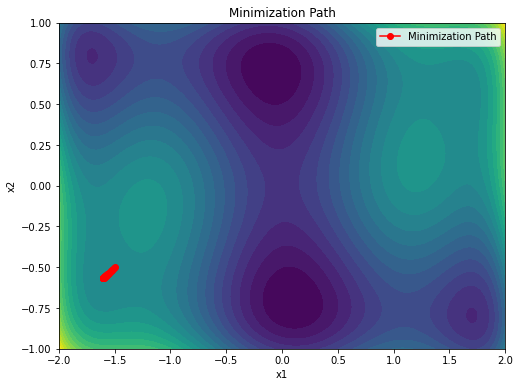

In [14]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3) * x1**4) + x1 * x2 + x2**2 * (-4 + 4 * x2**2)

def gradient(x1, x2):
    df_dx1 = 2 * x1**5 - 8.4 * x1**3 + 8 * x1 + x2
    df_dx2 = x1 - 8 * x2 + 16 * x2**3
    return df_dx1, df_dx2

def gradient_descent(f, gradient, x0, alpha=0.01, max_iter=1000, tol=1e-5):
    x = x0
    iter_count = 0
    path = [x]

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient(x[0], x[1])
        x1_new = x[0] - alpha * gradient_x1
        x2_new = x[1] - alpha * gradient_x2
        x_new = np.array([x1_new, x2_new])
        path.append(x_new)

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        iter_count += 1

    return x, iter_count, path

x0 = np.array([-1.5, -0.5])

x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

result, iterations, path = gradient_descent(f, gradient, x0)

print("Optimal x:", result)
print("Number of Iterations:", iterations)

path = np.array(path)
x_path = path[:, 0]
y_path = path[:, 1]

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 25), cmap='viridis')
plt.plot(x_path, y_path, 'ro-', label="Minimization Path")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Minimization Path")
plt.show()

#### 2.2.2 a/b

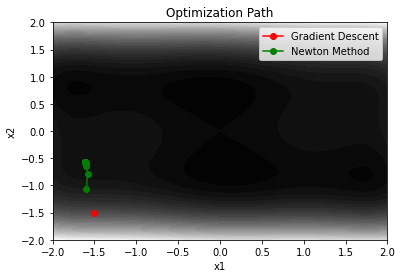

Gradient Descent took 1 steps to reach the minimum.
Newton Method took 1000 steps to reach the minimum.
Total number of iterations: 1001
Minimum x1 Using Combination of Methods: -1.6071047529201976
Minimum x2 Using Combination of Methods: -0.5686514548841313


In [15]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3) * x1**4) + x1 * x2 + x2**2 * (-4 + 4 * x2**2)

def gradient(x1, x2):
    df_dx1 = 2 * x1**5 - 8.4 * x1**3 + 8 * x1 + x2
    df_dx2 = x1 - 8 * x2 + 16 * x2**3
    return df_dx1, df_dx2

def hessian(x1, x2):
    hess = np.matrix([[0, 1], [1, 0]])
    hess[0, 0] = 8 - 25.2 * x1**2 + 10 * x1**4
    hess[1, 1] = -8 + 48 * x2**2
    return hess

def gradient_descent(f, gradient, x0, alpha=0.01, max_iter=1000, tol=1e-5):
    x = x0
    iter_count = 0
    path = [x] 
    gd_steps = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient(x[0], x[1])
        x1_new = x[0] - alpha * gradient_x1
        x2_new = x[1] - alpha * gradient_x2
        x_new = np.array([x1_new, x2_new])
        path.append(x_new)

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        gd_steps += 1
        iter_count += 1

    return x, path, gd_steps

def backtracking_line_search(f, gradient, x, alpha=0.5, beta=0.8, max_iter=100, tol=1e-5):
    iter_count = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient(x[0], x[1])
        step_size = 1.0

        f_x = f(x[0], x[1])

        while True:
            x1_new = x[0] - step_size * gradient_x1
            x2_new = x[1] - step_size * gradient_x2

            f_new = f(x1_new, x2_new)

            # armijo condition for backtracking line search
            if f_new <= f_x - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
                break
            step_size *= beta

        x_new = np.array([x1_new, x2_new])

        if np.linalg.norm(gradient(x_new[0], x_new[1])) < tol:
            break

        x = x_new
        iter_count += 1

    return x, step_size, iter_count

initial_guess = np.array([-1.5,-1.5])

x0 = initial_guess
max_iterations = 1000

path_gradient_descent = []
path_newton_method = []

path_gradient_descent.append(x0)

X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = f(X, Y)

for _ in range(max_iterations):
    grad = np.array(gradient(x0[0], x0[1]))
    hess = np.array(hessian(x0[0], x0[1]))

    if np.all(np.linalg.eigvals(hess) > 0):
        p = -np.linalg.solve(hess, grad)
        x1_new = x0[0] + p[0]
        x2_new = x0[1] + p[1]
        x_new = np.array([x1_new, x2_new])
        path_newton_method.append(x_new)
    else:
        x_new, _, _ = backtracking_line_search(f, gradient, x0)
        path_gradient_descent.append(x_new)
    
    x0 = x_new

path_gradient_descent = np.array(path_gradient_descent)
path_newton_method = np.array(path_newton_method)

plt.figure()
plt.contourf(X, Y, Z, levels=50, cmap='gray')

plt.plot(path_gradient_descent[:, 0], path_gradient_descent[:, 1], 'o-', color='r', label='Gradient Descent')

plt.plot(path_newton_method[:, 0], path_newton_method[:, 1], 'o-', color='g', label='Newton Method')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimization Path')
plt.legend()
plt.show()

gd_steps = len(path_gradient_descent)
nm_steps = len(path_newton_method)
total_iterations = gd_steps + nm_steps

print("Gradient Descent took", gd_steps, "steps to reach the minimum.")
print("Newton Method took", nm_steps, "steps to reach the minimum.")
print("Total number of iterations:", total_iterations)

min_x1_combined = path_newton_method[-1, 0]
min_x2_combined = path_newton_method[-1, 1]
print("Minimum x1 Using Combination of Methods:", min_x1_combined)
print("Minimum x2 Using Combination of Methods:", min_x2_combined)

#### 2.2.3

In [16]:
# Printed in each respective cell is the path required to reach the minimum as well as the number of iterations required. 

### 2.3 - The Rosenbrock function

#### 2.3.1

In [17]:
def rosenbrock(x1, x2, a=1, b=100):
    f = (a - x1)**2 + b * (x2 - x1**2)**2
    df_dx1 = -2 * (a - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return f

def hessian(x_1, x_2, a=1, b=100):
    hess = np.matrix('0 0; 0 0')
    hess[0, 0] = 2*(6*b*x_1**2-2*b*x_2+1)
    hess[0, 1] = -4*b*x_1
    hess[1, 0] = -4*b*x_1
    hess[1, 1] = 2*b
    return hess

starting_points = [(2, 2), (-1, -1), (0, 0), (-2, 2)]

#### 2.3.2

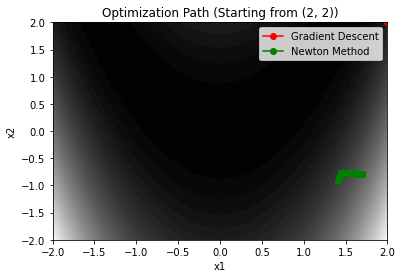

Gradient Descent took 1 steps to reach the minimum.
Newton Method took 1000 steps to reach the minimum.
Total number of iterations: 1001
Minimum x1 Using Combination of Methods: 1.69975973477645
Minimum x2 Using Combination of Methods: -0.7953235709430736


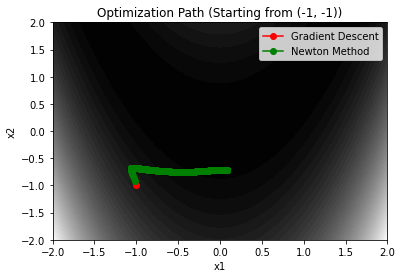

Gradient Descent took 1 steps to reach the minimum.
Newton Method took 1000 steps to reach the minimum.
Total number of iterations: 1001
Minimum x1 Using Combination of Methods: 0.08984201184955497
Minimum x2 Using Combination of Methods: -0.7126564028125113


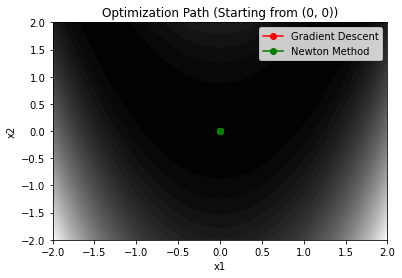

Gradient Descent took 1 steps to reach the minimum.
Newton Method took 1000 steps to reach the minimum.
Total number of iterations: 1001
Minimum x1 Using Combination of Methods: 0.0
Minimum x2 Using Combination of Methods: 0.0


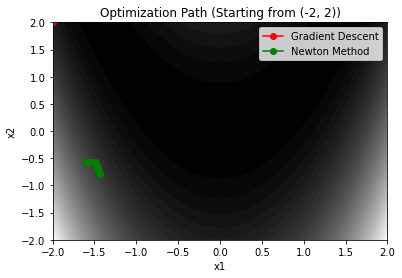

Gradient Descent took 1 steps to reach the minimum.
Newton Method took 1000 steps to reach the minimum.
Total number of iterations: 1001
Minimum x1 Using Combination of Methods: -1.5963905990960865
Minimum x2 Using Combination of Methods: -0.5674742918207847


In [18]:
def rosenbrock(x1, x2, a=1, b=100):
    f = (a - x1)**2 + b * (x2 - x1**2)**2
    df_dx1 = -2 * (a - x1) - 4 * b * x1 * (x2 - x1**2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return f

def hessian(x1, x2, a=1, b=100):
    hess = np.matrix([[0, 0], [0, 0]])
    hess[0, 0] = 2 * (6 * b * x1**2 - 2 * b * x2 + 1)
    hess[0, 1] = -4 * b * x1
    hess[1, 0] = -4 * b * x1
    hess[1, 1] = 2 * b
    return hess

def gradient_descent(f, gradient, x0, alpha=0.01, max_iter=1000, tol=1e-5):
    x = x0
    iter_count = 0
    path = [x] 
    gd_steps = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient(x[0], x[1])
        x1_new = x[0] - alpha * gradient_x1
        x2_new = x[1] - alpha * gradient_x2
        x_new = np.array([x1_new, x2_new])
        path.append(x_new)

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        gd_steps += 1
        iter_count += 1

    return x, path, gd_steps

def backtracking_line_search(f, gradient, x, alpha=0.5, beta=0.8, max_iter=100, tol=1e-5):
    iter_count = 0

    while iter_count < max_iter:
        gradient_x1, gradient_x2 = gradient(x[0], x[1])
        step_size = 1.0

        f_x = f(x[0], x[1])

        while True:
            x1_new = x[0] - step_size * gradient_x1
            x2_new = x[1] - step_size * gradient_x2

            f_new = f(x1_new, x2_new)

            # armijo condition for backtracking line search
            if f_new <= f_x - alpha * step_size * np.dot([gradient_x1, gradient_x2], [gradient_x1, gradient_x2]):
                break
            step_size *= beta

        x_new = np.array([x1_new, x2_new])

        if np.linalg.norm(gradient(x_new[0], x_new[1])) < tol:
            break

        x = x_new
        iter_count += 1

    return x, step_size, iter_count

starting_points = [(2, 2), (-1, -1), (0, 0), (-2, 2)]

for initial_guess in starting_points:
    x0 = np.array(initial_guess)
    max_iterations = 1000

    path_gradient_descent = []
    path_newton_method = []

    path_gradient_descent.append(x0)

    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = rosenbrock(X, Y)

    for _ in range(max_iterations):
        grad = np.array(gradient(x0[0], x0[1]))
        hess = np.array(hessian(x0[0], x0[1]))

        if np.all(np.linalg.eigvals(hess) > 0):
            p = -np.linalg.solve(hess, grad)
            x1_new = x0[0] + p[0]
            x2_new = x0[1] + p[1]
            x_new = np.array([x1_new, x2_new])
            path_newton_method.append(x_new)
        else:
            x_new, _, _ = backtracking_line_search(rosenbrock, gradient, x0)
            path_gradient_descent.append(x_new)

        x0 = x_new

    path_gradient_descent = np.array(path_gradient_descent)
    path_newton_method = np.array(path_newton_method)

    plt.figure()
    plt.contourf(X, Y, Z, levels=50, cmap='gray')

    plt.plot(path_gradient_descent[:, 0], path_gradient_descent[:, 1], 'o-', color='r', label='Gradient Descent')

    plt.plot(path_newton_method[:, 0], path_newton_method[:, 1], 'o-', color='g', label='Newton Method')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path (Starting from {})'.format(initial_guess))
    plt.legend()
    plt.show()

    gd_steps = len(path_gradient_descent)
    nm_steps = len(path_newton_method)
    total_iterations = gd_steps + nm_steps

    print("Gradient Descent took", gd_steps, "steps to reach the minimum.")
    print("Newton Method took", nm_steps, "steps to reach the minimum.")
    print("Total number of iterations:", total_iterations)

    min_x1_combined = path_newton_method[-1, 0]
    min_x2_combined = path_newton_method[-1, 1]
    print("Minimum x1 Using Combination of Methods:", min_x1_combined)
    print("Minimum x2 Using Combination of Methods:", min_x2_combined)